### Numerical Linear Algebra: Assignment 2

Name: Darix SAMANI SIEWE

## Exercise 1

Write a nonrecursive algorithm in the spirit of row-oriented forward substitution that implements column-oriented forward substitution. Use a single array that contains b initially, stores intermediate results (e.g. $\hat{b}$,b) during the computation, and contains y at the end. Use your algorithm to write a Julia program that solves the system Ax = b where

$
A = \begin{pmatrix}
    5 & 0 &0 \\
    2 &-4 & 0 \\
    1 & 2 & 3 \\
\end{pmatrix}
$,         $B=\begin{pmatrix} -15 \\ -2 \\ 10 \end{pmatrix}$

In [1]:
function non_recursive_column_oriented_forward(A, b)
    n = length(b)
    y = copy(b)
    for i in 1:n
        for j in 1:i-1
            y[i] = y[i] - A[i,j]y[j]
        end
        y[i] = y[i]/A[i,i]
    end
    return y
end

A = [5 0 0; 2 -4 0; 1 2 3]
b = Float64[-15 2 10]'
non_recursive_column_oriented_forward(A, b)

3×1 Matrix{Float64}:
 -3.0
 -2.0
  5.666666666666667

## Exercise 2

In [2]:
#install requirement package
using Pkg
Pkg.add("ToeplitzMatrices")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [3]:
using ToeplitzMatrices
using LinearAlgebra

# Number of carts
n = 20

# Create the tridiagonal matrix A
A = Tridiagonal(ones(n-1), 2 * ones(n), ones(n-1))

# Create the force vector b
b = zeros(n)
b[5] = 1.0    # f5 = 1
b[16] = -1.0  # f16 = -1

# Solve the system Ax = b
x = A \ b

# Round the displacement vector x in order to get the exact soltuion of our system 
x_rounded = round.(x)

# Output the results
println("The displacement vector x of our system is : ", x_rounded)

The displacement vector x of our system is : [1.0, -2.0, 3.0, -4.0, 5.0, -5.0, 5.0, -5.0, 5.0, -5.0, 5.0, -5.0, 5.0, -5.0, 5.0, -5.0, 4.0, -3.0, 2.0, -1.0]


## Exercise 3


In [4]:
using LinearAlgebra

# Define matrix A
A = [
    1.5  -1   -0.5   0;
   -1     2   -1     0;
   -0.5  -1    1.7  -0.2;
    0     0   -0.2   1.7
]

# Perform Cholesky factorization
L = cholesky(A).L

# Display the result
println("The Cholesky factor L of A is:")
L

The Cholesky factor L of A is:


4×4 LowerTriangular{Float64, Matrix{Float64}}:
  1.22474     ⋅        ⋅         ⋅ 
 -0.816497   1.1547    ⋅         ⋅ 
 -0.408248  -1.1547   0.447214   ⋅ 
  0.0        0.0     -0.447214  1.22474

## Exercise 4

Write your own Julia program that solves positive definite systems Ax = b by calling subroutines
to (a) calculate the Cholesky factor, (b) perform forward substitution, and (c) perform back
substitution. Try out your program on the following problems.

i) $\begin{bmatrix} 36 & -30 & 24\\
-30 & 34 &-26 \\
24 &-26 & 21 \\
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 0 \\ 12 \\-7 \end{bmatrix}$ 

In [5]:
function find_cholesky_factor(A)
    n = Int64(sqrt(length(A)))
    R = copy(A)
    for i in 1:n
        # Compute the diagonal element
        for k in 1:(i-1)
            R[i,i] = R[i,i] - R[k,i]^2
        end
         # Check for positive definiteness
        if R[i,i] <=0
            @assert println("matrix in not positive definitive")
        
        end
        R[i,i] = sqrt(R[i,i]) # fill loer trihular to value zero
        # Compute the off-diagonal elements
        for j in (i+1):n
            R[j,i] = 0.0
            for k in 1:i-1
                R[i,j] = R[i,j] - R[k,i]*R[k,j]
            end
            R[i,j] = R[i,j]/R[i,i]
        end
    end
    return R
end
A = Float64[36 -30 24; -30 34 -26; 24 -26 21]
b = Float64[0 12 -7]'

function forward_substitution(A, b)
    R = find_cholesky_factor(A)'
    n = length(b)
    y = copy(b)
    for i in 1:n
        for j in 1:i-1
            y[i] = y[i] - R[i,j]y[j]
        end
        y[i] = y[i]/R[i,i]
    end
    return y
end

function backward_substitution(A, b)
    R = find_cholesky_factor(A)
    n = length(b)
    y = copy(b)
    for i in 1:n
        for j in n+2-i:n
            y[n+1-i] = y[n+1-i] - R[n+1-i,j]*y[j]
        end
        y[n+1-i] = y[n+1-i]/R[n+1-i, n+1-i]
    end
    return y
end
print(A\b)
bb = forward_substitution(A, b)

backward_substitution(A, bb)

[0.9999999999999998; 1.999999999999997; 0.9999999999999964;;]

3×1 Matrix{Float64}:
 1.0
 2.0
 1.0

ii) $\begin{bmatrix} 1 & 1 & 1 & 1 & 1\\
1 & 2 & 2 & 2 & 2 \\
1 & 2 & 3 & 3 & 3 \\
1 & 2 & 3 & 4 & 4 \\
1 & 2 & 3 & 4 & 5 \\
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix} = \begin{bmatrix} 5 \\ 9 \\ 12 \\ 14 \\ 15 \end{bmatrix}$ 

In [6]:
A = [1 1 1 1 1; 1 2 2 2 2; 1 2 3 3 3; 1 2 3 4 4; 1 2 3 4 5]
b = [5 9 12 14 15]'

bb= forward_substitution(A, b)
backward_substitution(A, bb)

5×1 Matrix{Int64}:
 1
 1
 1
 1
 1

## Exercise 5


let's write the equation of our system : 
$
\begin{align*}
    \displaystyle
        \frac{-U_{i+1} +2U_i- U_{i-1}}{h^2} + \frac{U_{i+1} - U_{i-1}}{2h} + 2U_i = x_i \\
        \implies (-\frac{1}{h^2} + \frac{1}{2h})U_{i+1} + (\frac{2}{h^2} + 2)U_i +(-\frac{1}{h^2} - \frac{1}{2h})U_{i-1} = x_i \\
 \end{align*}
$

so based on the previous result the element in main diagonal is $\frac{2}{h^2} + 2$ and the element in bellow main diagonal is $(-\frac{1}{h^2} - \frac{1}{2h})$ and the element in above the diagonal is $(-\frac{1}{h^2} + \frac{1}{2h})$

In [7]:
# using Pkg to install the package Plots
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


[0.0, 0.02168732641131471, 0.0400425657847969, 0.051431986266358184, 0.05181710631022972, 0.03652793584721787, 0.0][0.0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334, 1.0]


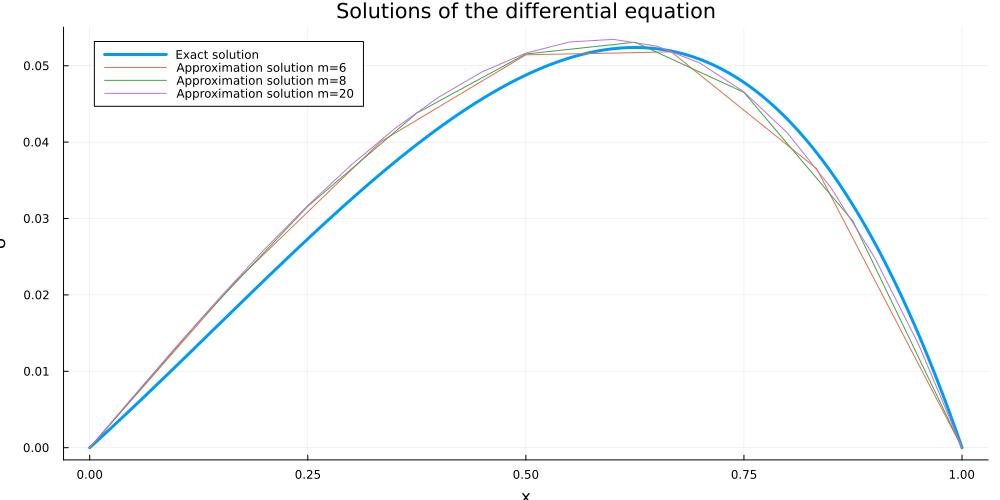

In [2]:
using LinearAlgebra
using Plots

function exact_solution(x)
    C2 = -(1+exp(-1))/(4(exp(2) - exp(-1)))
    C1 = (1/4) - C2
    return C1*exp(-x) + C2*exp(2*x) + 0.5*x -1/4
end

function solve_finite_difference(m)
    h = 1.0 / m
    x = range(h, stop=1-h, length=m-1)  # Interior points x_i

    # Define the diagonals of matrix A
    
    main_diag = fill((2/h^2 + 2), m-1)
    sub_diag = fill((-1/h^2 - 1/2*h), m-2)
    super_diag = fill(-1/h^2 + 1/2*h, m-2)

    # Construct the tridiagonal matrix A
    A = Tridiagonal(sub_diag, main_diag, super_diag)

    # Define the vector f
    f = collect(x)  # f_i = x_i

    # Solve the linear system A * u = f
    u = A \ f

    # Return the solution with boundary values added
    return [0.0; u; 0.0], [0.0; f; 1.0]#
end

f = range(0, stop=1, length=100000)
# Solve for m = 6, m = 8, and m = 20
u6, f6 = solve_finite_difference(6)
println(u6, f6)
u8, f8 = solve_finite_difference(8)
u20, f20 = solve_finite_difference(20)


p = plot(f, map(exact_solution, f), size = (1000, 500), title = "Solutions of the differential equation", label = "Exact solution", lw = 3)
plot!(p, f6, u6, label = "Approximation solution m=6")
plot!(p, f8, u8, label = "Approximation solution m=8")
plot!(p, f20, u20, label = "Approximation solution m=20")
xlabel!("x")
ylabel!("U")

### Iterpretation of the Plot 


**Exact Solution Curve**:

This is the smooth curve that represents the true solution of the differential equation. It is used as a reference for assessing the accuracy of the finite difference approximations.

#### Finite Difference Approximation Curves:

- For m=6, the solution has relatively large intervals between grid points, so the approximation may deviate noticeably from the exact solution.

- For m=8, the approximation improves as the grid spacing is reduced, capturing more details of the exact solution.

- For m= 20, the approximation is very close to the exact solution, indicating that a finer grid produces a more accurate solution.

### About convergence

The results illustrate the concept of convergence in numerical solutions. As m increases (i.e., as we add more grid points), the finite difference solution converges to the exact solution. This shows that a finer grid better captures the behavior of the differential equation.


